### Importing Libraries & Loading data set

In [10]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Importing Housing.csv
df = pd.read_csv('train1.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Analyzing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.shape

(1460, 81)

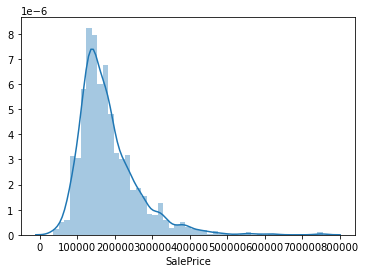

In [19]:
# Lets look at the distribution of the Target variable

sns.distplot(df['SalePrice']);

#### It is Right Skewed

In [20]:
from scipy import stats
df['SalePrice'].skew()

1.8828757597682129

In [21]:
df['SalePrice'].kurtosis()

6.536281860064529

### Analyzing Statistical Parameters

In [11]:
df.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[9 rows x 38 columns]

### Checking Missing values

In [9]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

#### Taking Threshold value 10% for my analysis and dropping the columns having null values more than 10%

In [12]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/
                                                                 len(df.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [13]:
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')

In [14]:
df.shape

(1460, 75)

### For Imputation of missing values, Checking the columns where the missing values lie between 0-10%

In [18]:

round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/
                                                                 len(df.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

#### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,e.g. the YearBuilt=2000 , & YearBuiltOld = 2010-2000 =10

In [22]:
df['YearBuilt_Old'] = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Old'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Old'] = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Old'] = df.YrSold.max()-df.YrSold
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  YearBuilt_Old  \
1095       2006          2006       2006.0    2007              4   
331        1958          1992       1958.0    2007             52   
821        1953          1953       1974.0    2009             57   
800        1997          1997       1997.0    2008             13   
624        1972          1972       1972.0    2006             38   
1354       2000          2000       2000.0    2008             10   
665        2000          2000       2000.0    2006             10   
779        1977          1977       1977.0    2006             33   
361        1940          1982       1940.0    2008             70   
33         1959          1959       1959.0    2010             51   

      YearRemodAdd_Old  GarageYrBlt_Old  YrSold_Old  
1095                 4              4.0           3  
331                 18             52.0           3  
821                 57             36.0           1  
800                 13             13.0           2  
624                 38             38.0           4  
1354                10             10.0           2  
665                 10             10.0           4  
779                 33             33.0           4  
361                 28             70.0           2  
33                  51             51.0           0

#### Dropping the actual year columns

In [23]:
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Imputing missing values with mean and mode.

#### Imputing categorial values with mode and numerical values with mean.


#### Note:  Imputing GarageYrBlt_Old with -1 as these houses do not have garage.

In [25]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageYrBlt_Old.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

In [26]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [27]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest variance hence dropping these columns

In [28]:
df = df.drop(['Street','Utilities'],axis='columns')

#### Removing "Id" column as well as it is of no use.

In [29]:
df = df.drop('Id',axis='columns')

In [30]:
df[list(df.dtypes[df.dtypes!='object'].index)].describe()

MSSubClass        LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342   103.685262   
std      42.300571    9981.264932     1.382997     1.112799   180.569112   
min      20.000000    1300.000000     1.000000     1.000000     0.000000   
25%      20.000000    7553.500000     5.000000     5.000000     0.000000   
50%      50.000000    9478.500000     6.000000     5.000000     0.000000   
75%      70.000000   11601.500000     7.000000     6.000000   164.250000   
max     190.000000  215245.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      3.409589    15.060959     2.758904     43.489041     6.321918   
std      29.317331    55.757415    40.177307    496.123024     2.703626   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     5.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     508.000000   480.000000   738.000000  15500.000000    12.000000   

           SalePrice  YearBuilt_Old  YearRemodAdd_Old  GarageYrBlt_Old  \
count    1460.000000    1460.000000       1460.000000      1460.000000   
mean   180921.195890      38.732192         25.134247        29.691096   
std     79442.502883      30.202904         20.645407        25.121824   
min     34900.000000       0.000000          0.000000        -1.000000   
25%    129975.000000      10.000000          6.000000         7.000000   
50%    163000.000000      37.000000         16.000000        25.500000   
75%    214000.000000      56.000000         43.000000        48.000000   
max    755000.000000     138.000000         60.000000       110.000000   

        YrSold_Old  
count  1460.000000  
mean      2.184247  
std       1.328095  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       4.000000  

[8 rows x 36 columns]

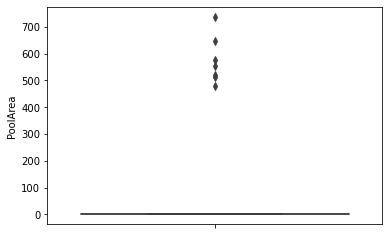

In [31]:
sns.boxplot(y = df['PoolArea'])

In [32]:
df['WoodDeckSF'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64

### Bivariate analysis

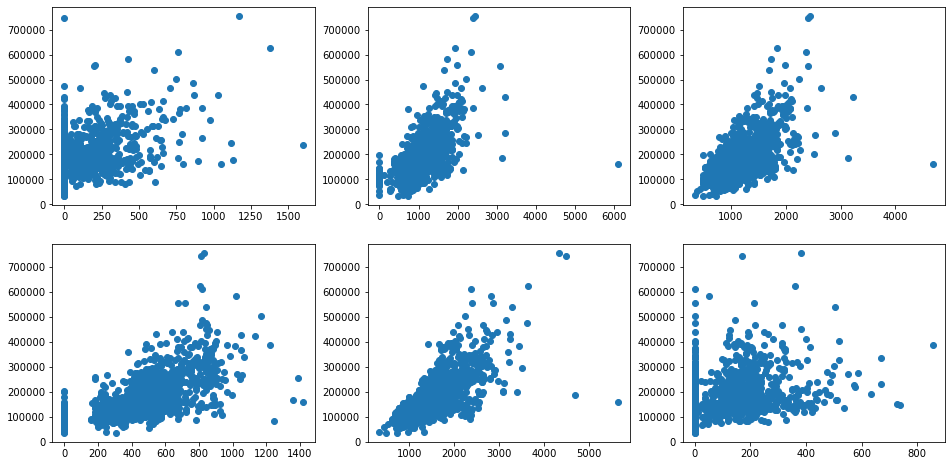

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

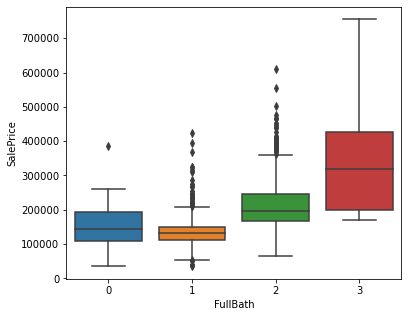

In [75]:
# Box plot

f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['FullBath'], y=df['SalePrice']);

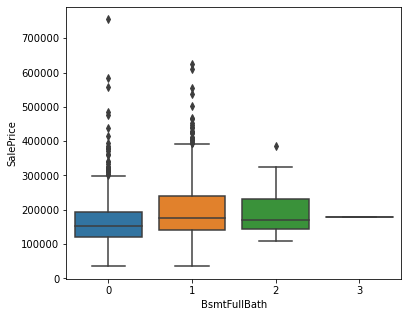

In [76]:
f, ax = plt.subplots(figsize=(6,5))
fig = sns.boxplot(x=df['BsmtFullBath'], y=df['SalePrice']);

#### Plotting heatmap to check the correlation between variables:

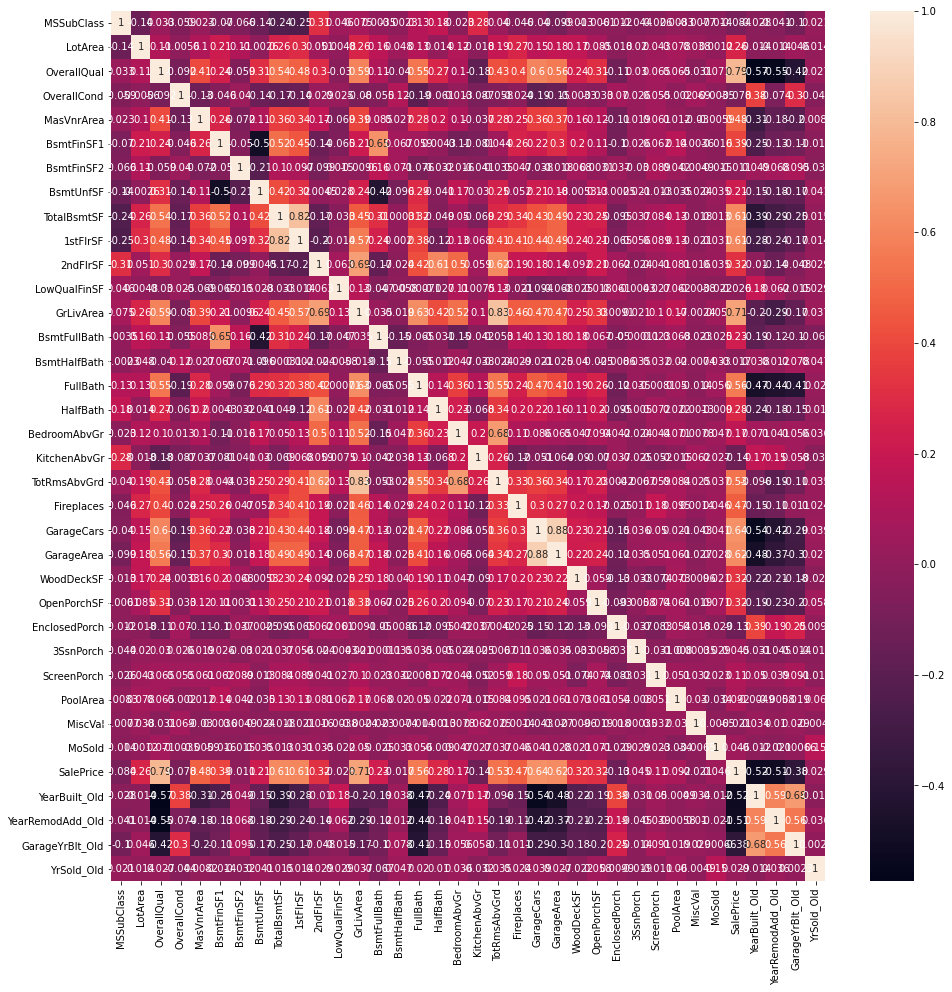

In [34]:
plt.figure(figsize=(16,16))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

#### Initiating function for handling the outliers considering the lower and upper quantile as 0.25 & 0.99 respectively.

In [35]:
df.shape

(1460, 72)

In [36]:
num_col = list(df.dtypes[df.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [37]:
df.shape

(1441, 72)

#### checking for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature.

In [38]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

LandSlope ExterQual BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       Gtl        Gd       Gd       TA           No          GLQ   
1       Gtl        TA       Gd       TA           Gd          ALQ   
2       Gtl        Gd       Gd       TA           Mn          GLQ   
3       Gtl        TA       TA       Gd           No          ALQ   
4       Gtl        Gd       Gd       TA           Av          GLQ   

  BsmtFinType2 HeatingQC CentralAir KitchenQual GarageFinish GarageQual  \
0          Unf        Ex          Y          Gd          RFn         TA   
1          Unf        Ex          Y          TA          RFn         TA   
2          Unf        Ex          Y          Gd          RFn         TA   
3          Unf        Gd          Y          Gd          Unf         TA   
4          Unf        Ex          Y          Gd          RFn         TA   

  GarageCond ExterCond LotShape  
0         TA        TA      Reg  
1         TA        TA      Reg  
2         TA        TA      IR1  
3         TA        TA      IR1  
4         TA        TA      IR1

In [39]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#### Lets take a look into the converted columns:

In [40]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

LandSlope  ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          0          3         4         3             1             6   
1          0          2         4         3             4             5   
2          0          3         4         3             2             6   
3          0          2         3         4             1             5   
4          0          3         4         3             3             6   

   BsmtFinType2  HeatingQC  CentralAir  KitchenQual  GarageFinish  GarageQual  \
0             1          4           1            3             2           3   
1             1          4           1            2             2           3   
2             1          4           1            3             2           3   
3             1          3           1            3             1           3   
4             1          4           1            3             2           3   

   GarageCond  ExterCond  LotShape  
0           3          2         3  
1           3          2         3  
2           3          2         0  
3           3          2         0  
4           3          2         0

#### Creating and joining dummy column with the actual dataset

In [42]:
dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

df = pd.concat([df,dummy_col],axis='columns')

df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

#### Let us check the distribution of our target variable before scaling and Splitting

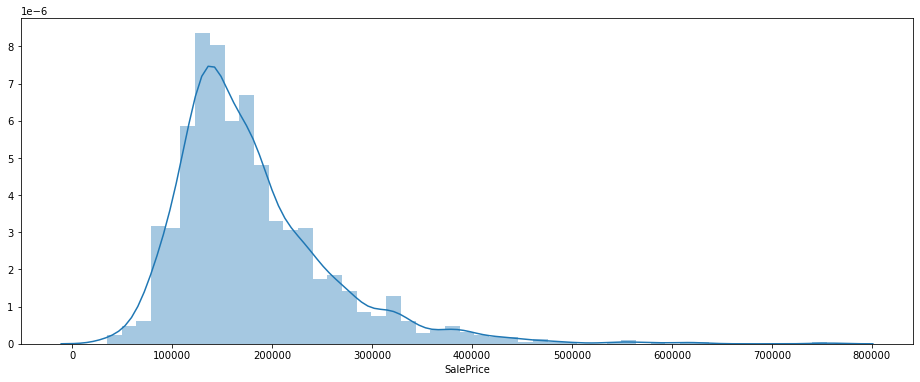

In [43]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

#### Creating train and test dataset for validation purpose

In [44]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [45]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

LandSlope  ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          0          3         4         3             1             6   
1          0          2         4         3             4             5   
2          0          3         4         3             2             6   
3          0          2         3         4             1             5   
4          0          3         4         3             3             6   

   BsmtFinType2  HeatingQC  CentralAir  KitchenQual  GarageFinish  GarageQual  \
0             1          4           1            3             2           3   
1             1          4           1            2             2           3   
2             1          4           1            3             2           3   
3             1          3           1            3             1           3   
4             1          4           1            3             2           3   

   GarageCond  ExterCond  LotShape  
0           3          2         3  
1           3          2         3  
2           3          2         0  
3           3          2         0  
4           3          2         0

#### Scaling the train dataset

#### Note: As scale of the dependent valriable SalePrice is very different with the independent variable therefore scaling the dependent variable¶

In [46]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Lets check the distribution again after scaling

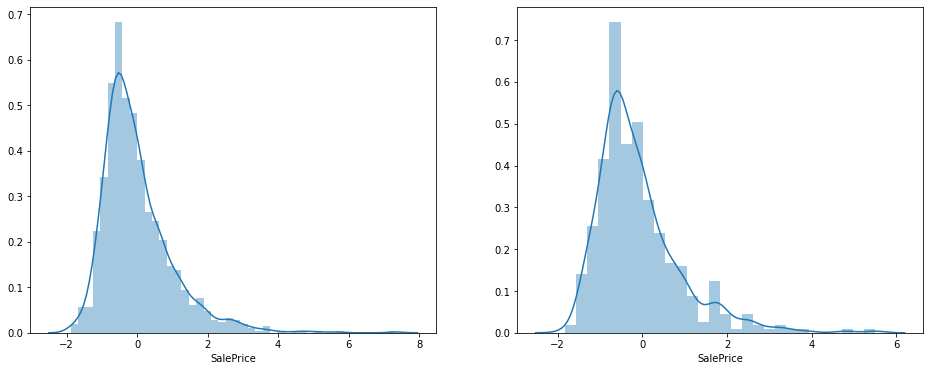

In [47]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [48]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [49]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Now using RFE lets try to to find the optimal number of feature

#### Note : I cannot use RFE with GridSearchCV as 192 variable with 5 folds will create 960 fit and it will take more than 1 Hour to get the result so i am using RFE directly.

In [50]:
len(X_train.columns)

193

In [51]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [52]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [53]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [54]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Creating Lasso regression model

In [55]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.894607430200713
0.847136872119475


In [56]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.3),
 ('LotArea', 0.215),
 ('LotShape', 0.126),
 ('LandSlope', 0.134),
 ('OverallQual', 0.08),
 ('OverallCond', 0.145),
 ('MasVnrArea', 0.035),
 ('ExterQual', -0.0),
 ('ExterCond', 0.068),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.086),
 ('BsmtExposure', -0.022),
 ('BsmtFinType1', 0.314),
 ('BsmtFinSF1', 0.138),
 ('BsmtFinType2', 0.126),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.174),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', -0.101),
 ('CentralAir', 0.211),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.247),
 ('GrLivArea', -0.134),
 ('BsmtFullBath', -0.071),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.264),
 ('HalfBath', 0.429),
 ('BedroomAbvGr', 0.113),
 ('KitchenAbvGr', 0.08),
 ('KitchenQual', -0.054),
 ('TotRmsAbvGrd', 0.085),
 ('Fireplaces', -2.109),
 ('GarageFinish', -0.174),
 ('GarageCars', 0.0),
 ('GarageArea', 0.119),
 ('GarageQual', -0.0),
 ('GarageCond', -0.23),
 ('WoodDeckSF', -0.046),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', -0.0),
 ('

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [57]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.045524      0.007908         0.005283        0.001411        0.001   
1       0.013496      0.002849         0.005620        0.001385        0.010   
2       0.011666      0.002406         0.006344        0.001707        0.100   
3       0.010435      0.001655         0.005905        0.001579        1.000   
4       0.009275      0.001834         0.004716        0.001128        5.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.840544           0.906822           0.820020   
1   {'alpha': 0.01}           0.818029           0.861956           0.838212   
2    {'alpha': 0.1}           0.745678           0.810079           0.772910   
3    {'alpha': 1.0}          -0.006496          -0.021566          -0.018063   
4    {'alpha': 5.0}          -0.006496          -0.021566          -0.018063   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.870452  ...            0.901825            0.896524   
1           0.834050  ...            0.846357            0.845088   
2           0.746296  ...            0.783173            0.791803   
3          -0.001154  ...            0.000000            0.000000   
4          -0.001154  ...            0.000000            0.000000   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.893997            0.893505            0.892197   
1            0.843201            0.842894            0.839987   
2            0.787571            0.786836            0.779160   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.908857            0.894691            0.891292   
1            0.877116            0.845573            0.840013   
2            0.821846            0.787063            0.782876   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   mean_train_score  std_train_score  
0          0.896325         0.005165  
1          0.847276         0.010242  
2          0.789666         0.011342  
3          0.000000         0.000000  
4          0.000000         0.000000  

[5 rows x 31 columns]

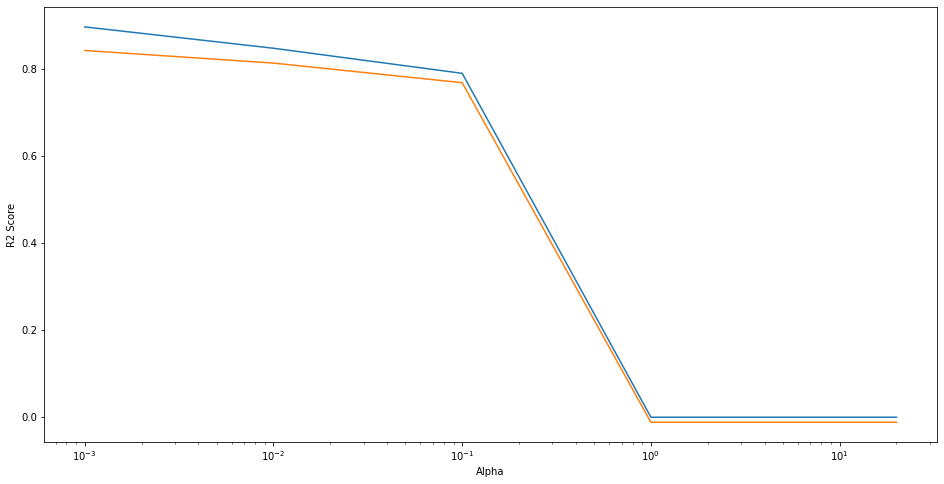

In [59]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [60]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [92]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.894607430200713
0.847136872119475


In [90]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [91]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
43              PoolArea  1.174898
27              HalfBath  0.384238
12          BsmtFinType1  0.315226
67  Neighborhood_Edwards  0.310728
26              FullBath  0.230590
1                LotArea  0.226288
22          LowQualFinSF  0.203909
19            CentralAir  0.193973
44               MiscVal  0.149552
3              LandSlope  0.147033

### Now lets go with the ridge regression

In [88]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9006151228633561
0.8333551744218473


#### As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [65]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.007549      0.004952         0.003431        0.000928        0.001   
1       0.008388      0.002746         0.004393        0.001436        0.010   
2       0.007239      0.002533         0.003756        0.000739        0.100   
3       0.005213      0.000397         0.003313        0.000639        0.200   
4       0.006332      0.000494         0.003475        0.000528        0.500   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.848907           0.913771           0.768324   
1   {'alpha': 0.01}           0.848963           0.913688           0.771339   
2    {'alpha': 0.1}           0.849433           0.912855           0.796610   
3    {'alpha': 0.2}           0.849805           0.911933           0.816873   
4    {'alpha': 0.5}           0.850354           0.909259           0.850911   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.876660  ...            0.909473            0.902534   
1           0.876611  ...            0.909469            0.902533   
2           0.876134  ...            0.909151            0.902462   
3           0.875641  ...            0.908414            0.902280   
4           0.874352  ...            0.905413            0.901367   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.900498            0.899765            0.898650   
1            0.900497            0.899764            0.898649   
2            0.900413            0.899690            0.898568   
3            0.900200            0.899497            0.898363   
4            0.899171            0.898537            0.897350   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.914571            0.900518            0.897240   
1            0.914570            0.900517            0.897239   
2            0.914540            0.900439            0.897163   
3            0.914462            0.900237            0.896967   
4            0.914075            0.899236            0.896003   

   mean_train_score  std_train_score  
0          0.902493         0.005229  
1          0.902492         0.005229  
2          0.902396         0.005208  
3          0.902157         0.005169  
4          0.901042         0.005106  

[5 rows x 31 columns]

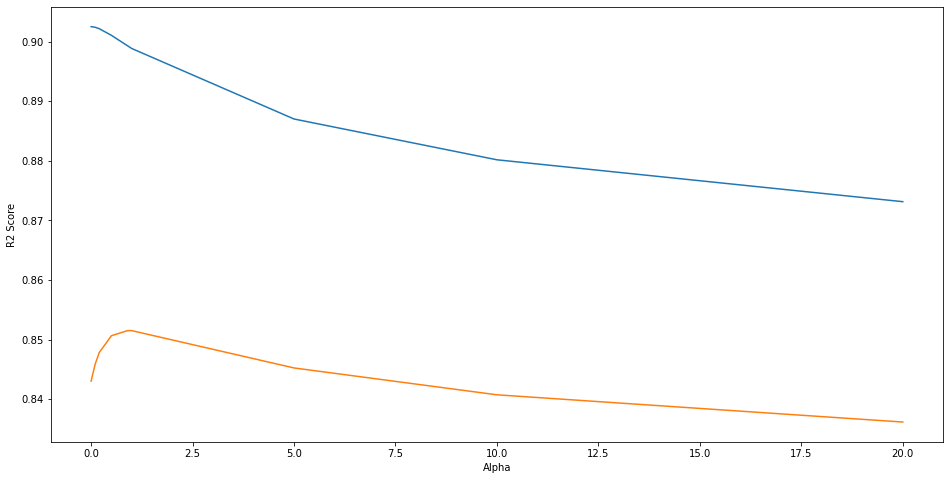

In [67]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph lets create the model

In [68]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.9}

In [84]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8980821992840651
0.8424217498085904


In [85]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [86]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
43              PoolArea  1.442963
27              HalfBath  0.462779
67  Neighborhood_Edwards  0.390797
40         EnclosedPorch  0.307516
26              FullBath  0.289509
14          BsmtFinType2  0.277564
16             BsmtUnfSF  0.275362
22          LowQualFinSF  0.270082
68  Neighborhood_Gilbert  0.262819
54       LandContour_HLS  0.233400

#### After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination so considering this as my final model

#### Final Model

In [80]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.894607430200713
0.847136872119475


#### After comparing both the models we can see that the below Features are best explaining the DataSet

       1. 'Pool Area'
       2. 'Half bath'
       3. 'Neighborhood_Edwards'
       4. 'BsmtFinType1'
       5. 'FullBath'

### Best alpha value for Lasso : {'alpha': 0.001}
### Best alpha value for Ridge : {'alpha': 0.9}